# 트랜스포머로 만드는 대화형 챗봇 

### 전체 흐름

- 데이터 처리
    - 전처리 
    - 토크나이징
    - max 길이 설정 후 패딩
    - seq2seq 구조를 위한 교사강요 데이터셋 제작
        - output을 한칸씩 밀어놓은 데이터셋 제작
- 모델 구조 만들기
    - positional encoding 함수
    - 닷프로덕트 함수
    - 멀티헤드 어텐션 함수
    - 마스킹 함수
    - encoder (layer)
    - decoder (layer)
    - transformer 
- 학습
    - optimizer, loss, metric 정의
    - learning rate 조절용 스케쥴러 정의
- 챗봇 inference 모델
    - input = [sentence, [[start_token]]]
    - 토큰화 풀기 = tokenizer.decode

### 결과 예시

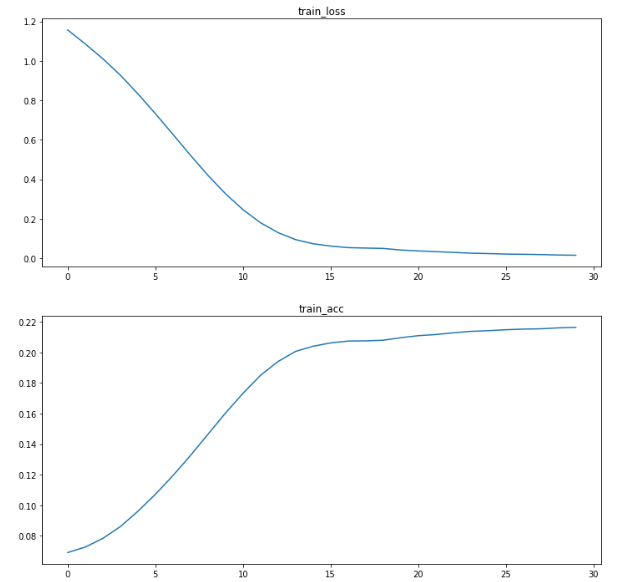

- 첫번째 실험 
    - max_length = 32
    - **loss: 0.0158 - accuracy: 0.2165**

--- 

연애 관련된 내용  
  
입력 : 안녕  
출력 : 안녕하세요 .
  
입력 : 나 너무 힘들어  
출력 : 지금 무슨 말을 해도 와닿지 않겠지만 잘할 수 있을 거예요 .
  
입력 : 넌 누구니?  
출력 : 저는 위로봇입니다 .
  
입력 : 나한테 무슨 도움을 줄수있니?  
출력 : 나를 힘들게 했나요 . 
  
입력 : 여자친구가 나를 힘들게해  
출력 : 당신은 살 가치가 있는 소중한 사람이에요 .
  
입력 : 여자친구가 필요해  
출력 : 함께 충분한 대화를 하고 상담을 받아보는 게 좋겠어요 .
  
입력 : 여친이 바람을 피우는건가?  
출력 : 달라지는게 없다면 이런 상황이 좋겠네요 

---
일상적인 내용  
  
입력 : 오늘 날씨가 좋은데 무슨 운동을 할까?  
출력 : 정말 사랑 앞에선 진실된 모습이 좋아요 .
  
입력 : 오늘 뭘 먹으면 좋을까?  
출력 : 좋아하면 오래 만날 수 있어요 .

#### 결과 분석
- 연애 관련된 데이터셋이라 그런지 관련된 내용에서는 답변을 잘해주지만 
    - 잘해주...는건 아닌것같고 그냥 어찌저지 답은 해준다
- 다른 주제에 대해서는 전혀 대답을 하지못하는 모습이있다. 


### 두번째 실험

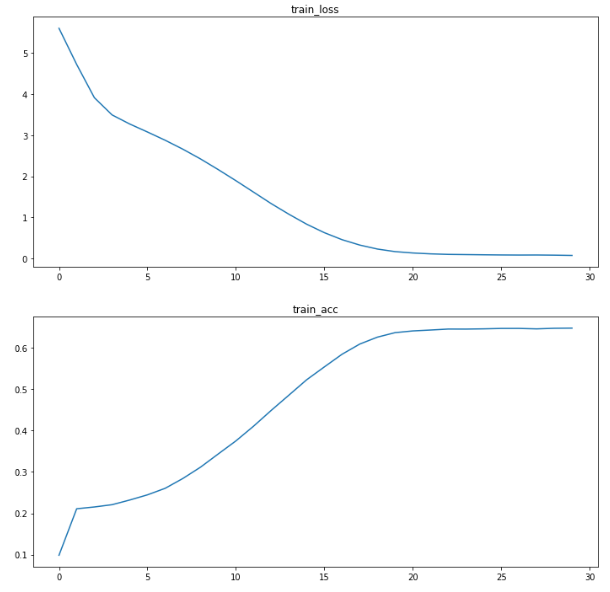


- 두번째 실험 
    - max_length = 10
    - **loss: 0.0776 - accuracy: 0.6469**

---
입력 : 안녕  
출력 : 안녕하세요 .
  
입력 : 나 너무 힘들어  
출력 : 많이 힘들었죠 .
  
입력 : 나한테 무슨 도움을 줄수있니?  
출력 : 천천히 그만두세요 .

입력 : 여자친구가 나를 힘들게해  
출력 : 잊을 수 있을 거예요 .  
  
입력 : 여자친구가 필요해  
출력 : 제가 위로 많이 해드릴게요 .
  
입력 : 여친이 바람을 피우는건가?  
출력 : 심플하게 꾸며보세요 .
   
입력 : 오늘 날씨가 좋은데 무슨 운동을 할까?  
출력 : 집밖에 나가기가 힘들것 같아요 

입력 : 오늘 뭘 먹으면 좋을까?  
출력 : 마음이 복잡한가봐요 .

#### 분석 
- 조금은..? 결과가 나아진것같다 그래도 완전하게 답변을 하지는 않는듯! 

### 세번째 실험
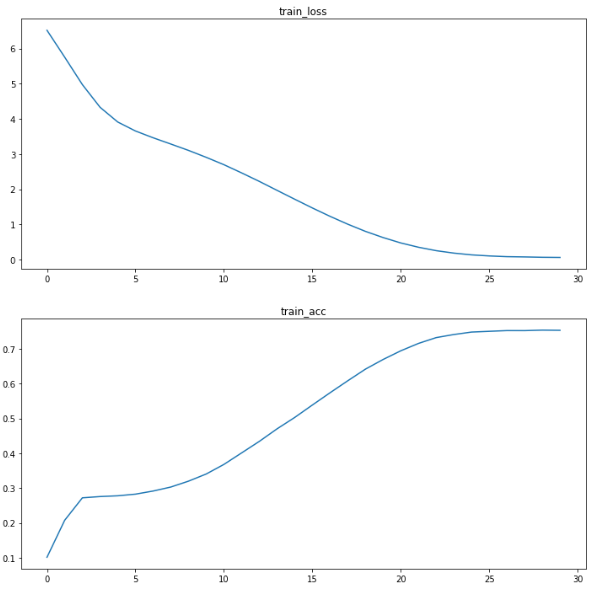

- 세번째 실험 
    - max_length = 8
    - **loss: 0.0600 - accuracy: 0.7533**
    
    
--- 
입력 : 나한테 무슨 도움을 줄수있니?  
출력 : 믿음을 주세요 .
  
입력 : 여친이 바람을 피우는건가?  
출력 : 누구든 사람에 따라 다르겠지요 .
  
입력 : 오늘 날씨가 좋은데 무슨 운동을 할까?  
출력 : 마음도 추운가요 .


- 여전히 이상한 소리를 한다


### 데이터 전처리

- 한국어는 어떤 부분에서 전처리를 해줘야할까
- 데이터를 살펴보니 눈에 띄는 부분이 몇개있었다.

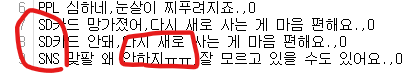

- 다음과 같은 영어 단어도 있다는점 -> 놔두자
- ㅠㅠ 와 같은 감정을 나타내는 표현이있다는점 -> 지워야 할까?

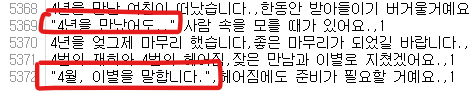

- 큰따옴표로 표현된 부분이있다 -> 지워도 상관없을까? -> 왠지 미리 되어있다 

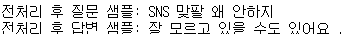

- 이걸 제거하는게 성능에 도움이 될지에 대해서도 비교해보자

### 전처리 비교
- 전처리전 voca_size = 8172
- 전처리후 voca_size = 8167  
  
- 조금 사이즈가 적어졌다 성능 차이는 미비할듯


# 회고 
  
트랜스포머를 이용한 QA 모델을 만들어보았다  
트랜스 포머는 모델 구조를 짜는데 생각보다 복잡했다. 여러가지 연산을 다 정의해야하는 부분이 어려웠다. 중간중간 함수를 빼먹어서 다시 붙여넣고 그랬다  
  
챗봇 모델 자체는 마음에 들게 작동하는것같다. 데이터셋도 굉장히 작은편인것같은데도 불구하고 적당히 답변을 주는 모습이었다.  
한글 데이터셋을 처리하는 방법에 대해서 추가로 알아보고싶다

한번 max_length를 바꿔봤는데 훨씬 성능이 좋아졌다
패딩이 많이 들어가는게 성능을 저하시키는듯 하다 
더 줄인다면 무슨일이?
8까지는 성능이 높아지는걸까? 
언어모델은 어떤 성능지표를 가지고 평가해야할까? 

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow_datasets as tfds
import tensorflow as tf
import re
import matplotlib.pyplot as plt

# 데이터 불러오기

In [3]:
# 데이터를 불러온다 전체 개수가 11000개 정도라서 그냥 다 불러왔다
data = pd.read_csv(os.getenv("HOME")+"/aiffel/transformer_chatbot/data/ChatbotData.csv")

In [4]:
data.iloc[0][0]

'12시 땡!'

In [5]:
len(data)

11823

# 한국어 전처리 함수

In [6]:
def preprocess_sentence(sentence):
    # 온점 사이에 공백을 넣기
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    # 연속 공백을 하나의 공백으로 변환
    sentence = re.sub(r'[" "]+', " ", sentence)
    # 큰따옴표를 제거
    sentence = re.sub(r'["]', '', sentence)
    # 완성되지 않은 표현을 제거 (ㅜㅜ 또는 ㅇㅇ 같은 느낌)
    sentence = re.sub(r"[ㄱ-ㅎㅏ-ㅣ]+", "", sentence)
    # 양쪽 공백을 제거
    sentence = sentence.strip()
    
    return sentence

In [7]:
def load_conversations():
    inputs, outputs = [], []
    for i in range(len(data)):
        inputs.append(preprocess_sentence(data.iloc[i][0]))
        outputs.append(preprocess_sentence(data.iloc[i][1]))
    return inputs, outputs

In [8]:
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 11823
전체 샘플 수 : 11823


In [9]:
ii = 7
print('전처리 후 질문 샘플: {}'.format(questions[ii]))
print('전처리 후 답변 샘플: {}'.format(answers[ii]))

전처리 후 질문 샘플: SNS 맞팔 왜 안하지
전처리 후 답변 샘플: 잘 모르고 있을 수도 있어요 .


# 토크나이징 진행 - 
- 한국어는 보통 형태로소 진행하지만
- 이번에는 subword로 진행하는 방식을 사용함
- voca_size는 2^13 으로 그대로 사용해봄 
    - 변경해야할 필요가있을까?

In [10]:
import tensorflow_datasets as tfds

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

In [11]:
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [12]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8165]
END_TOKEN의 번호 : [8166]


In [13]:
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8167


In [14]:
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [5759, 610, 2488, 4159]
정수 인코딩 후의 21번째 답변 샘플: [2355, 7505, 7, 6269, 97, 1]


# 패팅, 슬라이싱
- 샘플 최대 길이를 정하는 작업을 진행
- subword로 토크나이징 하는건 어떤의미지?
    - 토크나이징을 진행한다음 토큰의 개수로 통계를 내야하는거 아닌가?

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 16
텍스트의 평균 길이 : 3.937325551890383
요약의 최소 길이 : 1
요약의 최대 길이 : 24
요약의 평균 길이 : 4.71589275141673


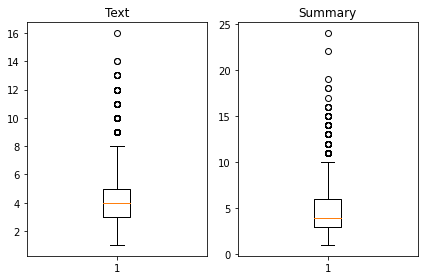

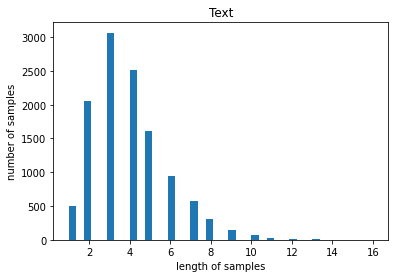

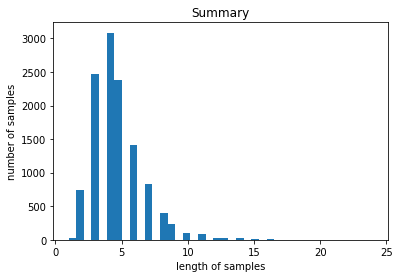

In [15]:
## 이건 원본 질문 샘플에 대한 길이에 대한 분석을 나타내는 코드이다

import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in questions]
summary_len = [len(s.split()) for s in answers]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 임시 토크나이징 된 문장 만들기

In [16]:
def test_tokenize(inputs,outputs):
    tokenized_inputs, tokenized_outputs = [], []
  
    for (sentence1, sentence2) in zip(inputs, outputs):
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        tokenized_inputs.append(sentence1)
        tokenized_outputs.append(sentence2)
        
    return tokenized_inputs, tokenized_outputs

In [17]:
T_questions, T_answers = test_tokenize(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(T_questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(T_answers)))

단어장의 크기 : 8167
필터링 후의 질문 샘플 개수: 11823
필터링 후의 답변 샘플 개수: 11823


# subword 로 토크나이징된 길이 분석
- 토크나이징이 끝나고나니 길이가 달라졌다
- 최데길이가 조금더 길어졌다 
- 32개로 진행하자 (패딩을 최소화 하면서 전체 데이터셋을 다 쓸예정)
- 두번째 실험은 평균보다 좀더 높은10으로 진행
- 세번째 실험은 평균에 딱 맞는 8로 진행

텍스트의 최소 길이 : 3
텍스트의 최대 길이 : 23
텍스트의 평균 길이 : 7.4902309058614565
요약의 최소 길이 : 3
요약의 최대 길이 : 31
요약의 평균 길이 : 7.8203501649327585


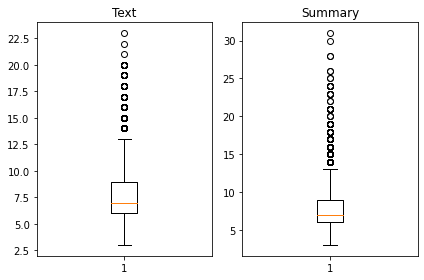

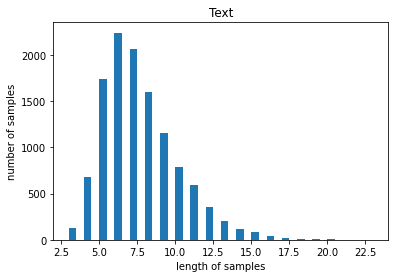

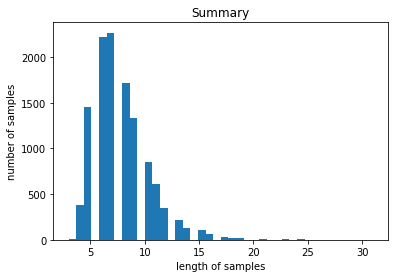

In [18]:
import matplotlib.pyplot as plt

text_len = [len(s) for s in T_questions]
summary_len = [len(s) for s in T_answers]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
MAX_LENGTH = 8

def tokenize_and_filter(inputs,outputs):
    tokenized_inputs, tokenized_outputs = [], []
  
    for (sentence1, sentence2) in zip(inputs, outputs):
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    # 최대 길이 35으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
        
    return tokenized_inputs, tokenized_outputs

# 오류! 
- questions answers를 계속 겹쳐서 쓰기때문에 두번씩 돌리면 오류가 난다..
- 원본 questions를 저장하면서 진행하자.... 

In [20]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8167
필터링 후의 질문 샘플 개수: 6055
필터링 후의 답변 샘플 개수: 6055


# 교사 강요 데이터셋 제작
- dataset = dataset.cache()
    - 데이터셋을 메모리 또는 디스크에 캐시합니다. 데이터셋을 한 번만 로드하고 이후에는 캐시된 데이터를 사용
    
- dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    - prefetch()는 데이터를 미리 가져와서 GPU나 TPU가 학습에 필요한 데이터를 대기하지 않고 바로 사용할 수 있도록 해줍니다.

In [21]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))


dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

# 데이터셋 완성~

# 모델 정의하기

In [22]:
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

슝=3


In [23]:
def scaled_dot_product_attention(query, key, value, mask):
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output

print("슝=3")

슝=3


In [24]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        outputs = self.dense(concat_attention)

        return outputs
print("슝=3")

슝=3


In [25]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

슝=3


### Encoder

In [26]:
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


In [27]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


## Decoder

In [28]:
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
        })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)
print("슝=3")

슝=3


In [29]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


# 트랜스 포머 제작

In [30]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

    # 인코더
    enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


In [31]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3144960     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [32]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [33]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


In [34]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [35]:
EPOCHS = 30
history = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/30
95/95 [==============================] - 9s 24ms/step - loss: 6.5201 - accuracy: 0.1013
Epoch 2/30
95/95 [==============================] - 2s 23ms/step - loss: 5.7562 - accuracy: 0.2075
Epoch 3/30
95/95 [==============================] - 2s 24ms/step - loss: 4.9757 - accuracy: 0.2720
Epoch 4/30
95/95 [==============================] - 2s 24ms/step - loss: 4.3306 - accuracy: 0.2756
Epoch 5/30
95/95 [==============================] - 2s 23ms/step - loss: 3.9115 - accuracy: 0.2779
Epoch 6/30
95/95 [==============================] - 2s 24ms/step - loss: 3.6567 - accuracy: 0.2826
Epoch 7/30
95/95 [==============================] - 2s 23ms/step - loss: 3.4633 - accuracy: 0.2915
Epoch 8/30
95/95 [==============================] - 2s 23ms/step - loss: 3.2853 - accuracy: 0.3030
Epoch 9/30
95/95 [==============================] - 2s 23ms/step - loss: 3.1041 - accuracy: 0.3199
Epoch 10/30
95/95 [==============================] - 2s 24ms/step - loss: 2.9073 - accuracy: 0.3405
Epoch 11/

Text(0.5, 1.0, 'train_acc')

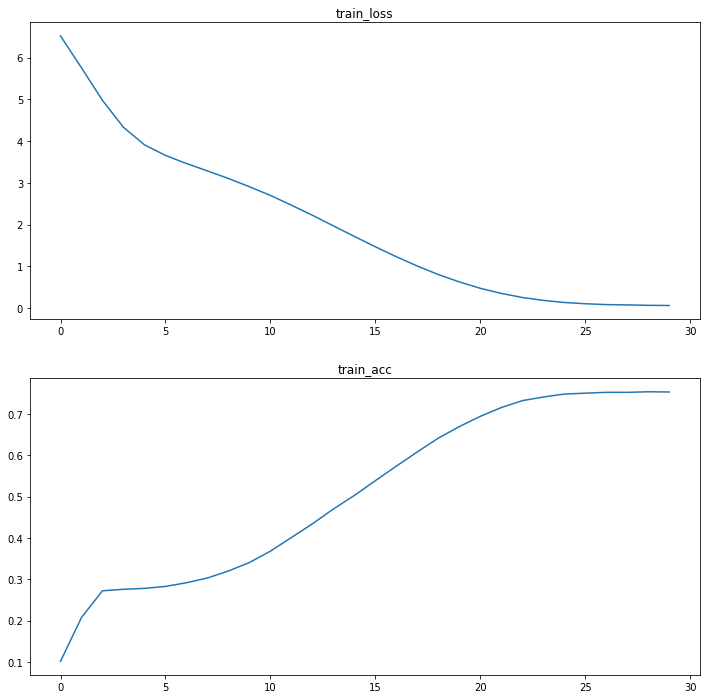

In [36]:
fig, axs = plt.subplots(2,1, figsize=(12,12))

axs[0].plot(history.history['loss'], label='train')
axs[0].set_title('train_loss')
axs[1].plot(history.history['accuracy'], label='train')
axs[1].set_title('train_acc')

# 오류 ! 

ValueError: Dimensions must be equal, but are 31 and 34 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](Reshape, Cast_2)' with input shapes: [?,31], [?,34].
      

아까 진행할때 전처리를 한번더 하면서 오류가 뜬게 한게 문제였던것같다 
이때 maxlength를 변경했었어서
커널을 전체적으로 한번더 돌려보자
  

# 챗봇 테스트 하기

In [37]:
output_sequence = tf.expand_dims(START_TOKEN, 0)
output_sequence

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8165]], dtype=int32)>

In [38]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


In [39]:
def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence
print("슝=3")

슝=3


SyntaxError: invalid syntax (3647695350.py, line 2)

In [41]:
sentence_generation('여친이 바람을 피우는건가?')

입력 : 여친이 바람을 피우는건가?
출력 : 누구든 사람에 따라 다르겠지요 .


'누구든 사람에 따라 다르겠지요 .'